### Multiple Linear Regression
- A linear regression model with more than one independent variable and one dependent variable

- Overdetermined System of Equation: Where number of observations (rows, n) are greater than number of features (columns, m) [n>m]
- Underdetermined System of Equation: Where number of observations (rows, n) are less than number of features (columns, m) [n<m]


- Possible solution's method of a square matrix [n = m]
1) Gaussian Elimination
2) Crammar's Rule
3) Simple Matrix Inversion
- Possible solution's method for non-square matrix [n != m]
1) Gauss Jordan Elimination
2) Moore Penrose Pseudo-inverse
3) SVD, QR De Composition, Cholesky Decomposition

#### Overfitting and Multi-collinearity 
- Overfitted model is just a model that contains more parameters than can be justified by the data
- Overfitting is caused by adding too many feature variables, which account for more variance and add nothing to the model
- Multicollinearity occurs when some or all the independent variables are correlated to each other. 
- Multicollinearity can be checked by two methods
1) Scatter plot 
2) Correlation cofficient
- All the independent variables should not be correlated to each other but must be correlated with the dependent variable

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
df = pd.read_csv("datasets/sampledata4D.csv")
df

,x1,x2,x3,y
0,89,4,3.84,7.0
1,66,1,3.19,5.4
2,78,3,3.78,6.6
3,111,6,3.89,7.4
4,44,1,3.57,4.8
5,77,3,3.57,6.4
6,80,3,3.03,7.0
7,66,2,3.51,5.6
8,109,5,3.54,7.3
9,76,3,3.25,6.4


<Axes: xlabel='x1', ylabel='x2'>

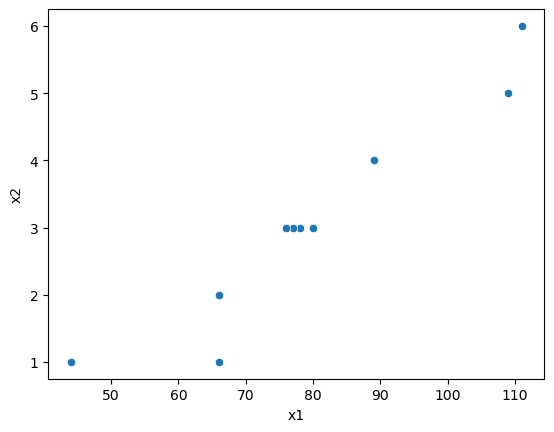

In [4]:
sns.scatterplot(x=df['x1'], y=df['x2'])

- There is a strong collinearity between x1 and x2 that will badly affect the model

<Axes: xlabel='x1', ylabel='x3'>

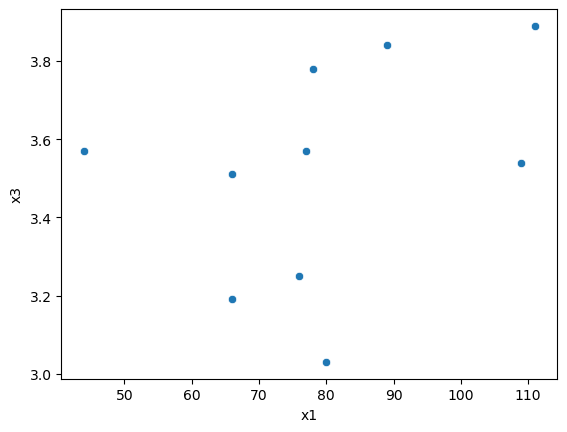

In [5]:
sns.scatterplot(x=df['x1'], y=df['x3'])

<Axes: xlabel='x2', ylabel='x3'>

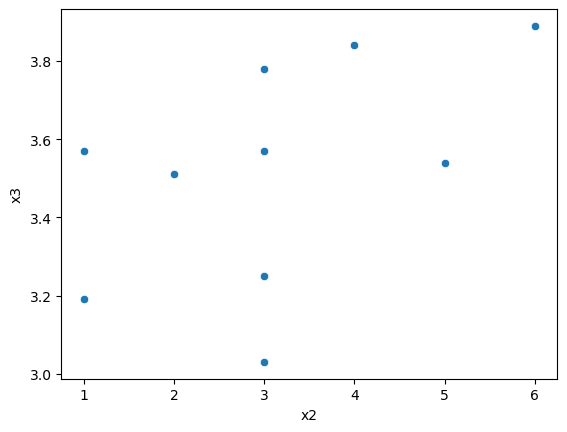

In [6]:
sns.scatterplot(x=df['x2'], y=df['x3'])

<Axes: xlabel='x1', ylabel='y'>

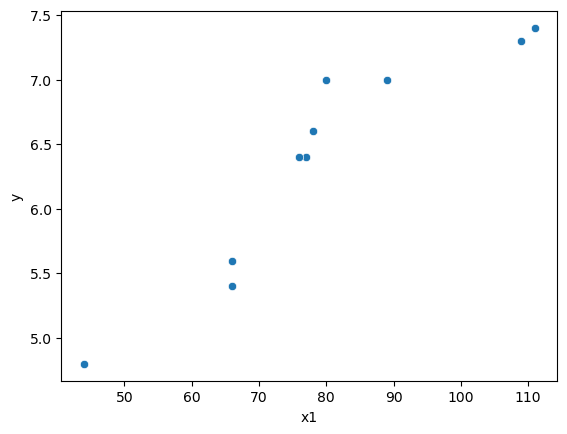

In [7]:
sns.scatterplot(x=df['x1'], y=df['y'])

<Axes: xlabel='x2', ylabel='y'>

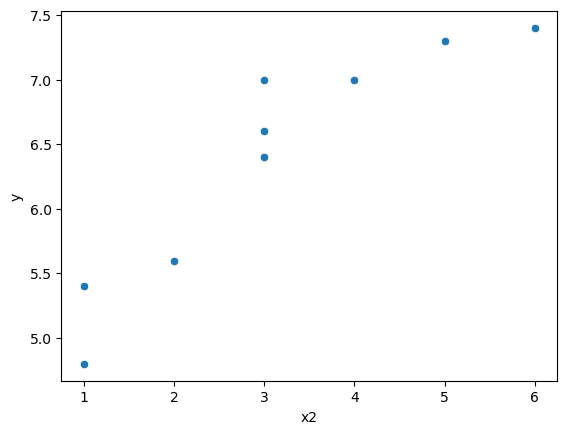

In [8]:
sns.scatterplot(x=df['x2'], y=df['y'])

<Axes: xlabel='x3', ylabel='y'>

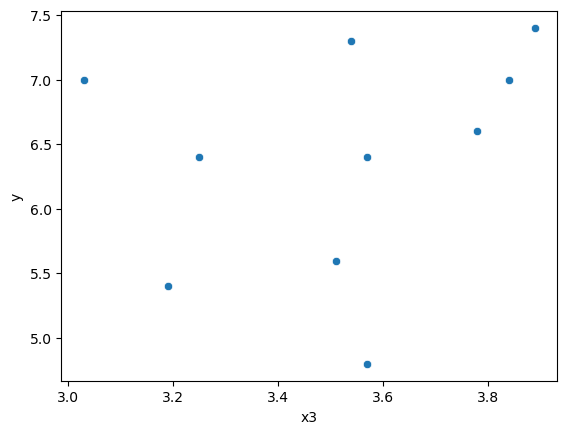

In [9]:
sns.scatterplot(x=df['x3'], y=df['y'])

- X3 will create high variance in the model and there is no relationship between x3 and y

In [15]:
x = df['x1']
y = df['x2']
numerator = np.sum(np.multiply(x-np.mean(x), y-np.mean(y)))
denumerator = np.multiply( np.sqrt(np.sum((x-np.mean(x))**2)), np.sqrt(np.sum((y-np.mean(y))**2)))
r = numerator/denumerator
r
# Strong relationship between x1, and x2

0.9558982066200346

In [16]:
x = df['x1']
y = df['x3']
numerator = np.sum(np.multiply(x-np.mean(x), y-np.mean(y)))
denumerator = np.multiply( np.sqrt(np.sum((x-np.mean(x))**2)), np.sqrt(np.sum((y-np.mean(y))**2)))
r = numerator/denumerator
r
# There is a week relationship between x1 and x3

0.35579623354708517

In [17]:
x = df['x2']
y = df['x3']
numerator = np.sum(np.multiply(x-np.mean(x), y-np.mean(y)))
denumerator = np.multiply( np.sqrt(np.sum((x-np.mean(x))**2)), np.sqrt(np.sum((y-np.mean(y))**2)))
r = numerator/denumerator
r
# Week relationship between between x2 and x3

0.4982421647401632

In [18]:
x = df['x1']
y = df['y']
numerator = np.sum(np.multiply(x-np.mean(x), y-np.mean(y)))
denumerator = np.multiply( np.sqrt(np.sum((x-np.mean(x))**2)), np.sqrt(np.sum((y-np.mean(y))**2)))
r = numerator/denumerator
r
# Strong relationship between between x1 and y

0.9281785008874762

In [19]:
x = df['x2']
y = df['y']
numerator = np.sum(np.multiply(x-np.mean(x), y-np.mean(y)))
denumerator = np.multiply( np.sqrt(np.sum((x-np.mean(x))**2)), np.sqrt(np.sum((y-np.mean(y))**2)))
r = numerator/denumerator
r
# Strong relationship between between x2 and y

0.916443396447027

In [21]:
x = df['x3']
y = df['y']
numerator = np.sum(np.multiply(x-np.mean(x), y-np.mean(y)))
denumerator = np.multiply( np.sqrt(np.sum((x-np.mean(x))**2)), np.sqrt(np.sum((y-np.mean(y))**2)))
r = numerator/denumerator
r
# Week relationship between between x3 and y

0.2672115310193847

#### Simple Linear Regression Using Matrix Algebra

In [22]:
import pandas as pd
import numpy as np
df = pd.read_csv("datasets/study-hours.csv")
df

,study_hours,gpa
0,1.0,1.4
1,2.0,1.6
2,3.0,2.5
3,4.0,2.6
4,5.0,3.5
5,6.0,3.7
6,7.0,4.0


In [28]:
sh = np.array(df['study_hours'])
y = np.array(df['gpa'])
sh

array([1., 2., 3., 4., 5., 6., 7.])

In [29]:
# Using numpy arrray.reshape method
sh = sh.reshape(sh.size, 1)
sh
# 1-D array has been changed into 2-D array
# First argument shows number of rows in the resulting array, 2nd element shows the number of columns in the resulting array

array([[1.],
       [2.],
       [3.],
       [4.],
       [5.],
       [6.],
       [7.]])

In [38]:
# To create a ones metric to add in the sh array to make a suitable matrix for multiplication
ch = np.ones((sh.size,1), np.int8)
ch
# First Element of the Tuple shows number of rows, and 2nd element shows number of columns

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]], dtype=int8)

In [39]:
x = np.hstack((ch,sh))
x

array([[1., 1.],
       [1., 2.],
       [1., 3.],
       [1., 4.],
       [1., 5.],
       [1., 6.],
       [1., 7.]])

In [40]:
# Finding the coefficient using numpy
# b = (x*xt)-1 * xt*y
b = np.linalg.inv(x.T@x)@x.T@y
b

array([0.9       , 0.46428571])

In [42]:
# Verify coefficients values using sklearn
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(sh,y)
model.intercept_
model.coef_

array([0.46428571])

In [44]:
#Prediction
y = b[0] + b[1] * 5
y

3.221428571428572

In [45]:
y = model.predict([[5]])
y

array([3.22142857])

#### Multiple Linear Regression Using OLS

In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
df = pd.read_csv("datasets/advertising4D.csv")
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


#### Correlation between input features and output label

<Axes: title={'center': 'Pearison Correlation Cofficient:0.228'}, xlabel='newspaper', ylabel='sales'>

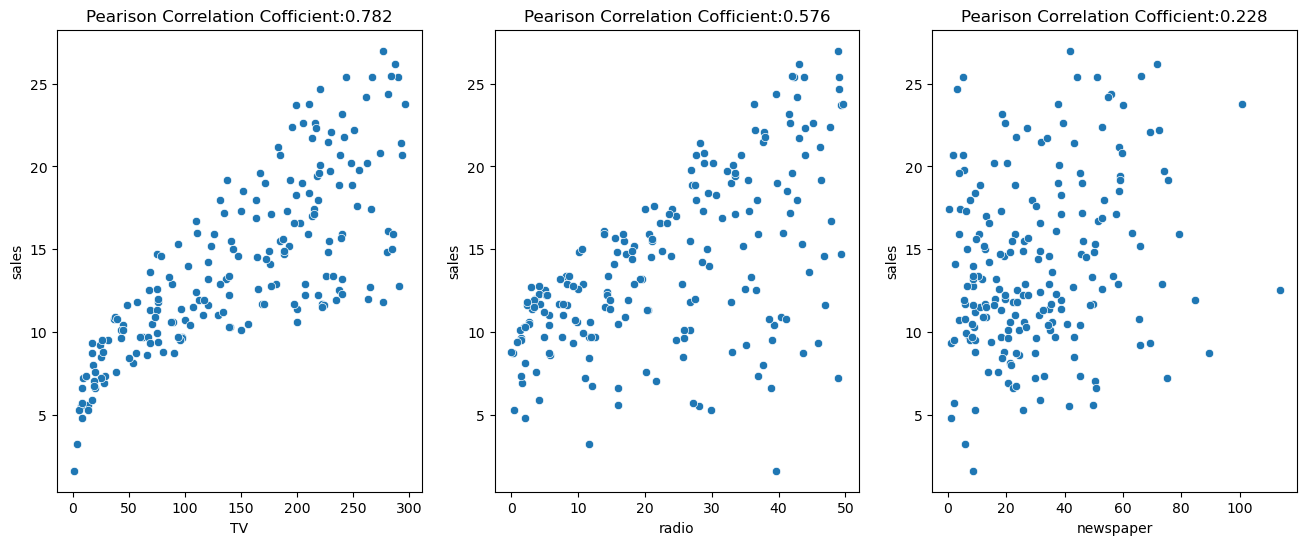

In [48]:
x = df['TV']
y = df['sales']
numerator = np.sum(np.multiply(x-np.mean(x), y-np.mean(y)))
denumerator = np.multiply( np.sqrt(np.sum((x-np.mean(x))**2)), np.sqrt(np.sum((y-np.mean(y))**2)))
r_tv = numerator/denumerator

x = df['radio']
y = df['sales']
numerator = np.sum(np.multiply(x-np.mean(x), y-np.mean(y)))
denumerator = np.multiply( np.sqrt(np.sum((x-np.mean(x))**2)), np.sqrt(np.sum((y-np.mean(y))**2)))
r_radio = numerator/denumerator

x = df['newspaper']
y = df['sales']
numerator = np.sum(np.multiply(x-np.mean(x), y-np.mean(y)))
denumerator = np.multiply( np.sqrt(np.sum((x-np.mean(x))**2)), np.sqrt(np.sum((y-np.mean(y))**2)))
r_newspaper = numerator/denumerator

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(16,6))
ax1.set_title("Pearison Correlation Cofficient:{:.3f}".format(r_tv))
sns.scatterplot(x=df['TV'], y=df['sales'], data = df, ax = ax1)

ax2.set_title("Pearison Correlation Cofficient:{:.3f}".format(r_radio))
sns.scatterplot(x=df['radio'], y=df['sales'], data = df, ax = ax2)

ax3.set_title("Pearison Correlation Cofficient:{:.3f}".format(r_newspaper))
sns.scatterplot(x=df['newspaper'], y=df['sales'], data = df, ax = ax3)

#### Correlation among the feature variables

<Axes: title={'center': 'Pearison Correlation Cofficient:0.057'}, xlabel='newspaper', ylabel='TV'>

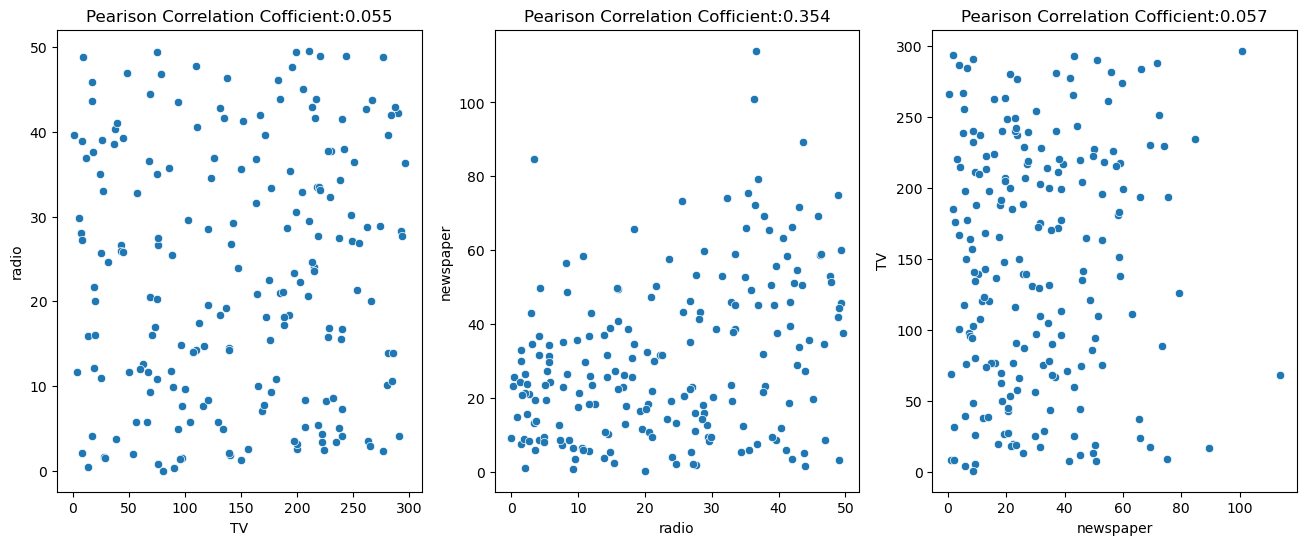

In [49]:
x = df['TV']
y = df['radio']
numerator = np.sum(np.multiply(x-np.mean(x), y-np.mean(y)))
denumerator = np.multiply( np.sqrt(np.sum((x-np.mean(x))**2)), np.sqrt(np.sum((y-np.mean(y))**2)))
r_tv_radio = numerator/denumerator

x = df['radio']
y = df['newspaper']
numerator = np.sum(np.multiply(x-np.mean(x), y-np.mean(y)))
denumerator = np.multiply( np.sqrt(np.sum((x-np.mean(x))**2)), np.sqrt(np.sum((y-np.mean(y))**2)))
r_radio_newspaper = numerator/denumerator

x = df['newspaper']
y = df['TV']
numerator = np.sum(np.multiply(x-np.mean(x), y-np.mean(y)))
denumerator = np.multiply( np.sqrt(np.sum((x-np.mean(x))**2)), np.sqrt(np.sum((y-np.mean(y))**2)))
r_newspaper_tv = numerator/denumerator

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(16,6))
ax1.set_title("Pearison Correlation Cofficient:{:.3f}".format(r_tv_radio))
sns.scatterplot(x=df['TV'], y=df['radio'], data = df, ax = ax1)

ax2.set_title("Pearison Correlation Cofficient:{:.3f}".format(r_radio_newspaper))
sns.scatterplot(x=df['radio'], y=df['newspaper'], data = df, ax = ax2)

ax3.set_title("Pearison Correlation Cofficient:{:.3f}".format(r_newspaper_tv))
sns.scatterplot(x=df['newspaper'], y=df['TV'], data = df, ax = ax3)

#### Creating matrix X and Y

In [2]:
y = np.array(df['sales'])
y

array([22.1, 10.4,  9.3, 18.5, 12.9,  7.2, 11.8, 13.2,  4.8, 10.6,  8.6,
       17.4,  9.2,  9.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. , 12.5,
        5.6, 15.5,  9.7, 12. , 15. , 15.9, 18.9, 10.5, 21.4, 11.9,  9.6,
       17.4,  9.5, 12.8, 25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7, 12.9,
        8.5, 14.9, 10.6, 23.2, 14.8,  9.7, 11.4, 10.7, 22.6, 21.2, 20.2,
       23.7,  5.5, 13.2, 23.8, 18.4,  8.1, 24.2, 15.7, 14. , 18. ,  9.3,
        9.5, 13.4, 18.9, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 11. , 11.8, 12.3, 11.3, 13.6, 21.7, 15.2, 12. , 16. ,
       12.9, 16.7, 11.2,  7.3, 19.4, 22.2, 11.5, 16.9, 11.7, 15.5, 25.4,
       17.2, 11.7, 23.8, 14.8, 14.7, 20.7, 19.2,  7.2,  8.7,  5.3, 19.8,
       13.4, 21.8, 14.1, 15.9, 14.6, 12.6, 12.2,  9.4, 15.9,  6.6, 15.5,
        7. , 11.6, 15.2, 19.7, 10.6,  6.6,  8.8, 24.7,  9.7,  1.6, 12.7,
        5.7, 19.6, 10.8, 11.6,  9.5, 20.8,  9.6, 20.7, 10.9, 19.2, 20.1,
       10.4, 11.4, 10.3, 13.2, 25.4, 10.9, 10.1, 16

In [5]:
x = np.array(df.drop("sales", axis = 1))
x

array([[230.1,  37.8,  69.2],
       [ 44.5,  39.3,  45.1],
       [ 17.2,  45.9,  69.3],
       [151.5,  41.3,  58.5],
       [180.8,  10.8,  58.4],
       [  8.7,  48.9,  75. ],
       [ 57.5,  32.8,  23.5],
       [120.2,  19.6,  11.6],
       [  8.6,   2.1,   1. ],
       [199.8,   2.6,  21.2],
       [ 66.1,   5.8,  24.2],
       [214.7,  24. ,   4. ],
       [ 23.8,  35.1,  65.9],
       [ 97.5,   7.6,   7.2],
       [204.1,  32.9,  46. ],
       [195.4,  47.7,  52.9],
       [ 67.8,  36.6, 114. ],
       [281.4,  39.6,  55.8],
       [ 69.2,  20.5,  18.3],
       [147.3,  23.9,  19.1],
       [218.4,  27.7,  53.4],
       [237.4,   5.1,  23.5],
       [ 13.2,  15.9,  49.6],
       [228.3,  16.9,  26.2],
       [ 62.3,  12.6,  18.3],
       [262.9,   3.5,  19.5],
       [142.9,  29.3,  12.6],
       [240.1,  16.7,  22.9],
       [248.8,  27.1,  22.9],
       [ 70.6,  16. ,  40.8],
       [292.9,  28.3,  43.2],
       [112.9,  17.4,  38.6],
       [ 97.2,   1.5,  30. ],
       [26

In [6]:
x = np.insert(x, 0, 1, axis = 1)
x

array([[  1. , 230.1,  37.8,  69.2],
       [  1. ,  44.5,  39.3,  45.1],
       [  1. ,  17.2,  45.9,  69.3],
       [  1. , 151.5,  41.3,  58.5],
       [  1. , 180.8,  10.8,  58.4],
       [  1. ,   8.7,  48.9,  75. ],
       [  1. ,  57.5,  32.8,  23.5],
       [  1. , 120.2,  19.6,  11.6],
       [  1. ,   8.6,   2.1,   1. ],
       [  1. , 199.8,   2.6,  21.2],
       [  1. ,  66.1,   5.8,  24.2],
       [  1. , 214.7,  24. ,   4. ],
       [  1. ,  23.8,  35.1,  65.9],
       [  1. ,  97.5,   7.6,   7.2],
       [  1. , 204.1,  32.9,  46. ],
       [  1. , 195.4,  47.7,  52.9],
       [  1. ,  67.8,  36.6, 114. ],
       [  1. , 281.4,  39.6,  55.8],
       [  1. ,  69.2,  20.5,  18.3],
       [  1. , 147.3,  23.9,  19.1],
       [  1. , 218.4,  27.7,  53.4],
       [  1. , 237.4,   5.1,  23.5],
       [  1. ,  13.2,  15.9,  49.6],
       [  1. , 228.3,  16.9,  26.2],
       [  1. ,  62.3,  12.6,  18.3],
       [  1. , 262.9,   3.5,  19.5],
       [  1. , 142.9,  29.3,  12.6],
 

In [7]:
b = np.linalg.inv(x.T@x)@x.T@y
b

array([ 2.93888937e+00,  4.57646455e-02,  1.88530017e-01, -1.03749304e-03])

In [9]:
# Prediction
y = b[0] + b[1] * 180 + b[2] * 10 + b[3] * 58
y

13.001651124149404

#### EValuation of the Model

In [30]:
y = np.array(df['sales'])
b = np.linalg.inv(x.T@x)@x.T@y
n = len(y)
ybar = np.mean(y)
sse = np.sum((y-yhat)**2)
sst = np.sum((y-ybar)**2)

yhat = b[0] + b[1] * df['TV'] + b[2] * df['radio'] + b[3] * df['newspaper']
mae = (np.sum(abs(y-yhat)))/n
mse = (np.sum((y-yhat)**2))/n
rmse = (np.sqrt((np.sum((y-yhat)**2))/n))
r2 = 1-(sse/sst)
print("MAE: {:.3f}".format(mae),"MSE: {:.3f}".format(mse), "RMSE: {:.3f}".format(rmse), "R2 Score:{:.3f}".format(r2) )
r2.dtype

MAE: 1.252 MSE: 2.784 RMSE: 1.669 R2 Score:0.897


dtype('float64')

#### Adjusted R2 Score
- The limitation of R2 score is that, if we add more features in our data, it either increase are remains same, but never decrease
- Adjusted R2 is the updated form of R2 score, if addition of new features increase the performance of the model, it will increase, if if addition of new features decrease the performance of the model, it will decrease
-  r2a = 1-((1-r2)(n-1)/(1-m-n))

In [32]:
m = 3
n  = 200
# r2 = np.int8(r2)
r2a = 1-((1-r2)*(n-1)/(n-m-1))
print("r2a:{:.3f}".format(r2a))

r2a:0.896


#### Assumptions for Linear Regression
-   ***Linearity***
- All features should be correlated with the output variable
- Can be checked using correlation coefficient and Scatterplot
- Violation will cause overfitting
-   ***Independence***
- There should not be a correlation relationship between feature variables 
- Can be checked using scatterplot and correlation coefficient
- Violation will cause multicollinearity
-   ***Homoscedasticity***
- It is a condition where the variance of the residual errors in the regression model is constant
- Can be checked using residual plots
-   ***Normality***
- The residuals of the regression line are approximately normaly distributed
- Can be checked by drawing the histogram of the residuals
